  Vehicle ID            Timestamp   Latitude  Longitude       Speed  \
0       V711  2023-11-29 00:02:00  40.722709 -74.002860  107.299702   
1       V242  2023-11-29 00:03:00  40.712652 -74.010994  118.450984   
2       V901  2023-11-29 00:05:00  40.717736 -73.995778   58.002755   
3       V070  2023-11-29 00:07:00  40.715190 -73.996709   87.629649   
4       V398  2023-11-29 00:08:00  40.727761 -74.023747   23.767257   

    Direction  
0   52.387692  
1  103.689659  
2  355.241075  
3   84.506555  
4   37.348395  


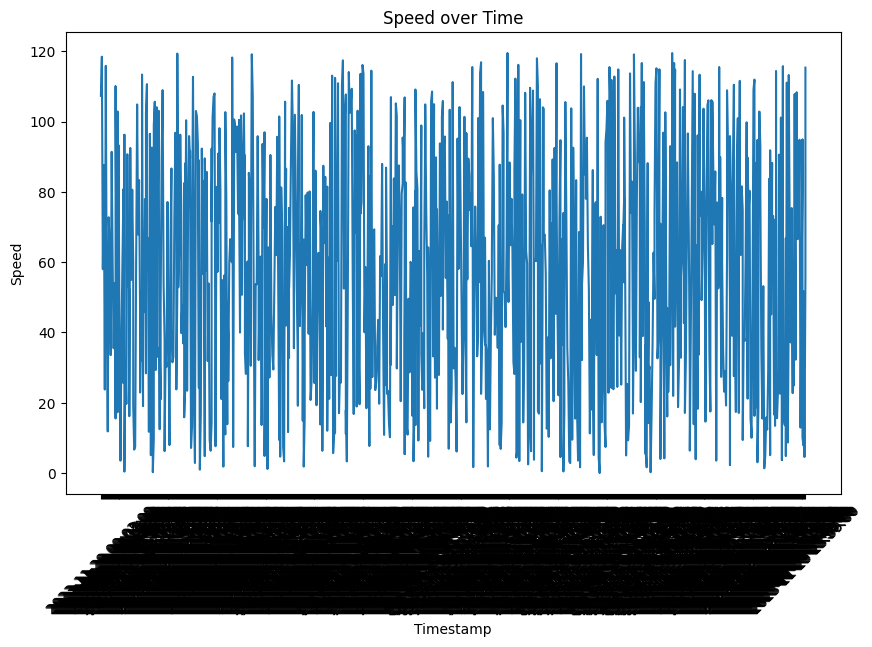

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/traffic_data.csv')
print(df.head())

plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Speed'])
plt.title('Speed over Time')
plt.xlabel('Timestamp')
plt.ylabel('Speed')
plt.xticks(rotation=45)
plt.show()

In [3]:

missing_values = df.isnull().sum()

df_cleaned = df.drop_duplicates()


df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])


missing_values, df_cleaned.dtypes, df_cleaned.head()

(Vehicle ID    0
 Timestamp     0
 Latitude      0
 Longitude     0
 Speed         0
 Direction     0
 dtype: int64,
 Vehicle ID            object
 Timestamp     datetime64[ns]
 Latitude             float64
 Longitude            float64
 Speed                float64
 Direction            float64
 dtype: object,
   Vehicle ID           Timestamp   Latitude  Longitude       Speed   Direction
 0       V711 2023-11-29 00:02:00  40.722709 -74.002860  107.299702   52.387692
 1       V242 2023-11-29 00:03:00  40.712652 -74.010994  118.450984  103.689659
 2       V901 2023-11-29 00:05:00  40.717736 -73.995778   58.002755  355.241075
 3       V070 2023-11-29 00:07:00  40.715190 -73.996709   87.629649   84.506555
 4       V398 2023-11-29 00:08:00  40.727761 -74.023747   23.767257   37.348395)

In [4]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.3 MB/s e

In [6]:
pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.2.0 requires scipy~=1.10.1, but you have scipy 1.11.4 which is incompatible.


In [7]:
from pycaret.clustering import *

# Setup the clustering
clus_setup = setup(data=df_cleaned, ignore_features=['Vehicle ID', 'Timestamp'], session_id=123)

# Create the DBSCAN model
dbscan_model = create_model('dbscan', eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed

# Assign the labels to the dataset
df_clustered = assign_model(dbscan_model)

# Display the clustered dataset
print(df_clustered.head())

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 6)"
2,Transformed data shape,"(1000, 4)"
3,Ignore features,2
4,Numeric features,4
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

    Latitude  Longitude       Speed   Direction     Cluster
0  40.722710 -74.002861  107.299706   52.387691  Cluster -1
1  40.712654 -74.010994  118.450981  103.689659  Cluster -1
2  40.717735 -73.995781   58.002754  355.241089  Cluster -1
3  40.715191 -73.996712   87.629646   84.506554  Cluster -1
4  40.727760 -74.023750   23.767258   37.348396  Cluster -1


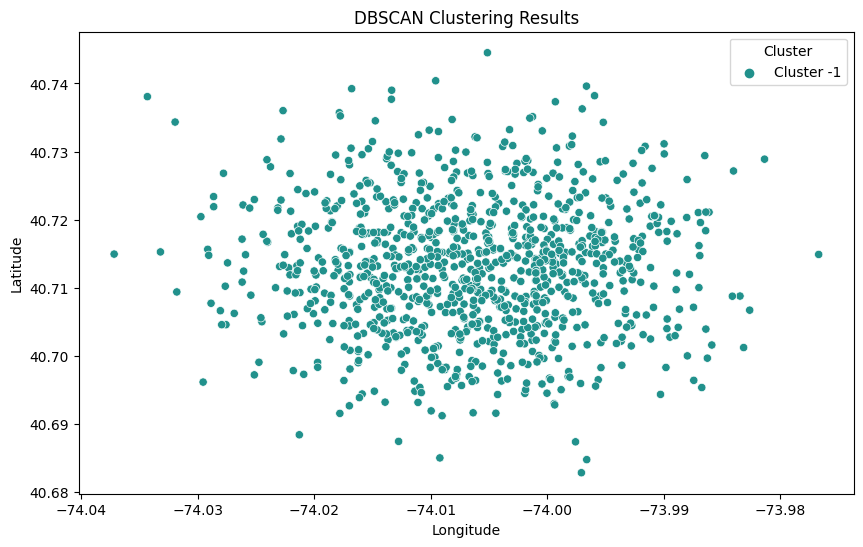

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your dataset includes the cluster labels
# Assuming 'Cluster' is the name of the column containing cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clustered, x='Longitude', y='Latitude', hue='Cluster', palette='viridis', legend='full')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()